In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import re

In [2]:
test_df = pd.read_csv("data/titanic_survival/test.csv")
train_df = pd.read_csv("data/titanic_survival/train.csv")
#sns.displot(x=train_df["Fare"],kind="hist")

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 47.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

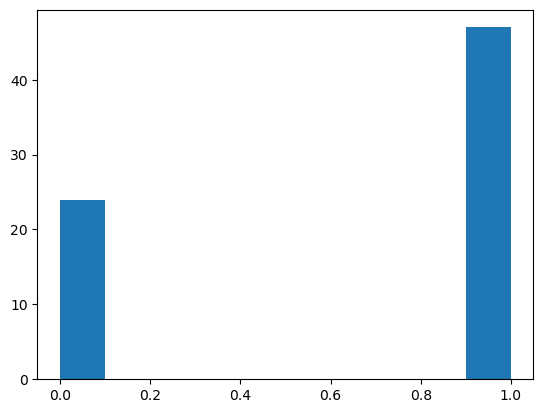

In [3]:
#this is testing data's significance
    #removing data without useful patterns or trends


    #adding 2 features.
    #why?
    #wouldnt knowing the sibcount and if married be treated differently?

    #perform data grabbing, only rows with partners & no sibcount, then with partners & siblingcount & siblingcount no partner & no siblingcount and no partner
    #how to only grab rows that pass
    #This data is significant so dont compound to one feature
spouse_df = train_df[(train_df["Parch"] > 0) & (train_df["SibSp"] == 0) ] #23:50 #Not_Survived:Survived
partner_and_non_spouse_relatives_df = train_df[(train_df["Parch"] > 0) & (train_df["SibSp"] > 0) ] #80:58
non_spouse_relatives_df = train_df[(train_df["Parch"] == 0) & (train_df["SibSp"] > 0) ] #70:70
no_relatives = train_df[(train_df["Parch"] == 0) & (train_df["SibSp"] == 0) ] #370:155
plt.hist(x=spouse_df["Survived"]) 

In [4]:
data = [train_df,test_df]

deck_numeric_dictionary = {
    "A":1,
    "B":2,
    "C":3,
    "D":4,
    "E":5,
    "F":6,
    "G":7,
    "U":8
}

for dataset in data:
    #extracting and converting data
    #havent tested the sinificance of Deck survival rate


    
    dataset["Deck"] = dataset["Cabin"].fillna("U0")
    dataset["Deck"] = dataset["Deck"].map( lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck_numeric_dictionary)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    print(dataset["Deck"].unique())
    dataset["Deck"] = dataset["Deck"].astype(int)
    
    # test_deck = dataset[dataset["Deck"] == 8.0]
    # #8:7
    # #12:35
    # #24:35
    # #8:25
    # #8:24
    # #5:8
    # #2:2
    # #480:210
    # #plt.hist(x=test_deck["Survived"]) 
    # dataset["Deck"]

    
    # dataset["Deck_Type_Sum"] = dataset["Deck"].map(lambda x : type(x))

    # #are the numbers not floats but numpy objects? no they displayed as floats
    
    # print(dataset["Deck_Type_Sum"])
    # dataset["Deck_Type_Sum"] = dataset["Deck"].map(lambda x : type(x) == type(float))
    # print(dataset["Deck_Type_Sum"])
    # print(dataset["Deck_Type_Sum"].sum())
    # dataset["Deck_Type_Sum"].values
    # dataset["Deck_Is_In_0_8_Range"] = ((dataset["Deck"] >= 0) & (dataset["Deck"] < 8))


[8. 3. 5. 7. 4. 1. 2. 6. 0.]
[8 2 5 1 3 4 6 7]


In [5]:
dataset["Deck"].value_counts()

Deck
8    327
3     35
2     18
4     13
5      9
6      8
1      7
7      1
Name: count, dtype: int64

In [6]:
#dropping data (should be at the end
for dataset in data:
    dataset = dataset.drop(columns=["Ticket","PassengerId"])

    print(dataset)

     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch     Fare Cabin Embarked  Deck  
0      male  22.0      

In [7]:
#formatting data

gendermap = {
    "male":0,
    "female":1
}

embarkedmap = {
    "S":0,
    "C":1,
    "Q":2
}


for dataset in data:
    dataset["Grouped_Fare"] = dataset["Fare"].fillna(0)
    dataset["Grouped_Fare"] = dataset["Grouped_Fare"].astype(int)
    #dont need to make a group because data meaning is the same for both
    dataset["Sex"] = dataset["Sex"].map(gendermap)
    dataset["Embarked"] = dataset["Embarked"].map(embarkedmap)
    dataset["Embarked"] = dataset["Embarked"].fillna(0)
    dataset["Embarked"] = dataset["Embarked"].astype(int)



In [8]:
#changing format of age feature
for dataset in data:
    dataset["Age_Group"] = dataset["Age"].fillna(0)
    dataset["Age_Group"] = dataset["Age_Group"].astype(int)
    
    dataset.loc[dataset["Age"] < 11,"Age_Group"] = 0
    dataset.loc[(dataset["Age"] >= 11) & (dataset["Age"] < 18) ,"Age_Group"] = 1
    dataset.loc[(dataset["Age"] >= 18) & (dataset["Age"] < 22) ,"Age_Group"] = 2
    dataset.loc[(dataset["Age"] >= 22) & (dataset["Age"] < 27) ,"Age_Group"] = 3
    dataset.loc[(dataset["Age"] >= 27) & (dataset["Age"] < 33) ,"Age_Group"] = 4
    dataset.loc[(dataset["Age"] >= 33) & (dataset["Age"] < 40) ,"Age_Group"] = 5
    dataset.loc[(dataset["Age"] >= 40) & (dataset["Age"] < 66) ,"Age_Group"] = 6
    dataset.loc[dataset["Age"] >= 66 ,"Age_Group"] = 7



In [9]:
#making grouped fare feature
for dataset in data:
    dataset.loc[dataset["Fare"] < 7.91, "Grouped_Fare"] = 0
    dataset.loc[(dataset["Fare"] >= 7.91) & (dataset["Fare"] < 14.454), "Grouped_Fare"] = 1
    dataset.loc[(dataset["Fare"] >= 14.454) & (dataset["Fare"] < 31), "Grouped_Fare"] = 2
    dataset.loc[(dataset["Fare"] >= 31) & (dataset["Fare"] < 99), "Grouped_Fare"] = 3
    dataset.loc[(dataset["Fare"] >= 99) & (dataset["Fare"] < 250), "Grouped_Fare"] = 4
    dataset.loc[dataset["Fare"] >= 250, "Grouped_Fare"] = 5
    print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [15]:
#question for calvin. Isnt having a title feature for Mr Mrs and Ms useless becuase that relationship is already present in the data?

#retest the significance of parch nad SibSp parch = Parent or children count

for dataset in data:
    
    dataset["New_Series"] = dataset["Name"].map(lambda x: "1" if re.compile("Master").search(x) else "0" )
    print(dataset["New_Series"])

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: New_Series, Length: 891, dtype: object
0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    1
Name: New_Series, Length: 418, dtype: object


##  We will step through these calculations one line at a time.  Once we understand each line we will understand how to work together to accomplish the goal

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

###  Deep dive into this code snippet from above:

```
total = train_df.isnull().sum().sort_values(ascending=False)
```

In [ ]:
train_df.isnull()

In [ ]:
print(type(train_df))
print(type(train_df["PassengerId"]))
print(type(train_df.isnull()))
print(type(train_df.isnull().sum()))

In [ ]:
train_df.isnull().sum()

In [ ]:
train_df.columns.values

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
print(total)

###  Deep dive into this code snippet from above:

```
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
```

In [ ]:
null_count_df = train_df.isnull().sum()

In [ ]:
total_count_df = train_df.isnull().count()

In [ ]:
null_count_df

In [ ]:

total_count_df

In [ ]:
percent_1 = null_count_df / total_count_df *100
percent_1

###  Deep dive into this code snippet from above:
```
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
```

In [ ]:
round(percent_1, 1)

In [ ]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)


###  Deep dive into this code snippet from above:

```
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
```

In [ ]:
percent_2

In [ ]:
total

In [ ]:
missing_data = pd.concat([total, percent_2], axis=1)
missing_data

In [ ]:
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data